In [1]:
import numpy as np;
import pandas as pd;
from sklearn.model_selection import train_test_split;
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.linear_model import LogisticRegression;
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier;
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt;
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder;

In [2]:
import nltk;
import re;
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv("./mail_data.csv");

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
spam_count = len(df[df['Category'] == 'spam'])
non_spam_count = len(df[df['Category'] == 'ham'])


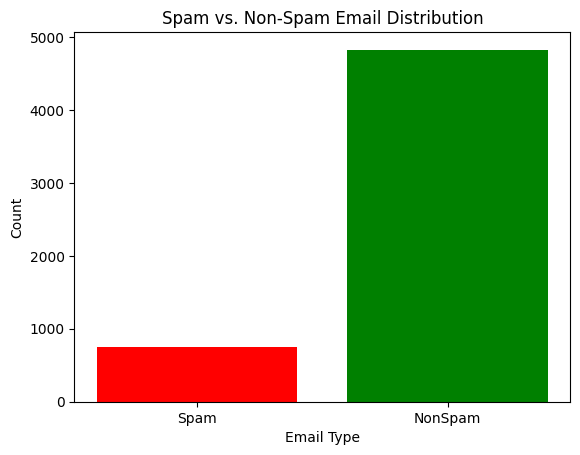

In [7]:
plt.bar(['Spam','NonSpam'],[spam_count,non_spam_count],color=['red','green'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Spam vs. Non-Spam Email Distribution')
plt.show()

In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())

    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

In [10]:
df['Message'] = df['Message'].apply(preprocess_text)

In [11]:
df['Category'].head(10)

0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
6     ham
7     ham
8    spam
9    spam
Name: Category, dtype: object

In [12]:
encoder =  LabelEncoder();
classes =  ['ham','spam']
encoder.classes_ = classes;
df['Category'] = encoder.fit_transform(df['Category']);

In [13]:
df['Message'].head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: Message, dtype: object

In [14]:
x = df['Message'].values
y = df['Category'].values

In [15]:
print(y)

[0 0 1 ... 0 0 0]


In [16]:
print(x.shape)

(5572,)


In [17]:
mailVectorizer = TfidfVectorizer(max_features=5000);
x = mailVectorizer.fit_transform(x)

In [18]:
print(x.shape)

(5572, 5000)


In [19]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
print(x_train.shape)
print(x_test.shape)

(4457, 5000)
(1115, 5000)


In [21]:
LogisticModel = LogisticRegression();
RandomForestModel = RandomForestClassifier();
DecisionTreeModel = DecisionTreeClassifier();

In [22]:
LogisticModel.fit(x_train,y_train)
RandomForestModel.fit(x_train,y_train)
DecisionTreeModel.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
models = [LogisticModel,RandomForestModel,DecisionTreeModel] 
accuracy_scores=[];
for model in models:
    prediction_train = model.predict(x_train);  
    prediction_test  = model.predict(x_test);
    accuracy_train = accuracy_score(prediction_train,y_train);
    accuracy_test = accuracy_score(prediction_test,y_test);
    accuracy_scores.append([accuracy_train,accuracy_test]);

In [24]:
i=0;
for [accuracy_train,accuracy_test] in accuracy_scores:
    print(f"Model {models[i]}:")
    i+=1;
    print(f"Accuracy_train = {accuracy_train}, Accuracy_test = {accuracy_test}")

Model LogisticRegression():
Accuracy_train = 0.973749158626879, Accuracy_test = 0.95695067264574
Model RandomForestClassifier():
Accuracy_train = 0.9997756338344178, Accuracy_test = 0.9757847533632287
Model DecisionTreeClassifier():
Accuracy_train = 0.9997756338344178, Accuracy_test = 0.957847533632287


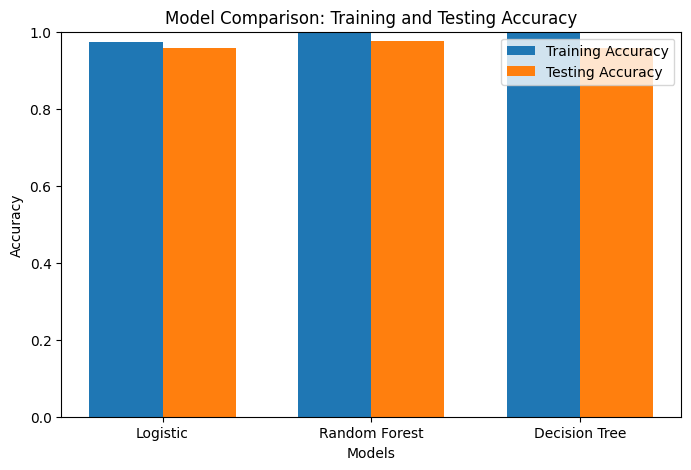

In [25]:
model_names = ['Logistic', 'Random Forest', 'Decision Tree']

train_scores = [score[0] for score in accuracy_scores]
test_scores = [score[1] for score in accuracy_scores]

bar_width = 0.35
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(8,5))
plt.bar(r1, train_scores, width=bar_width, label='Training Accuracy')
plt.bar(r2, test_scores, width=bar_width, label='Testing Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Training and Testing Accuracy')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names)
plt.legend()
plt.ylim(0, 1)
plt.show()

In [26]:
print(y[:20])
y_predict = DecisionTreeModel.predict(x);
print(y_predict[:20])

[0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1]
[0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1]


In [27]:
final_model = models[np.argmax(test_scores)]

In [28]:
import joblib;

In [29]:
joblib.dump(final_model,'SpamModel.joblib')
joblib.dump(mailVectorizer,'MailVectorizer.joblib')

['MailVectorizer.joblib']